In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

from encoding_information.gpu_utils import limit_gpu_memory_growth  
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *

sampling_indices = (3, 4)

## Generate many objects in parallel

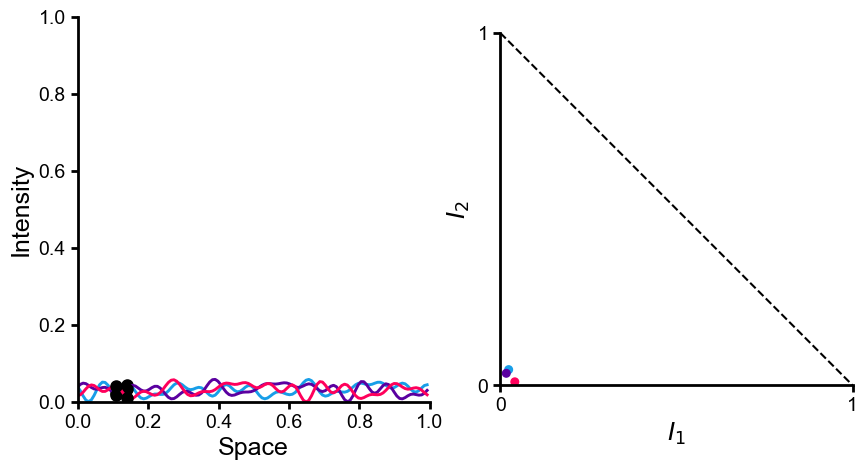

In [2]:
n_objects = 20
objects = np.array([sample_amplitude_object('delta') for i in range(n_objects)])

# generate random convolution kernel
random_kernel = bandlimited_nonnegative_signal(nyquist_samples=generate_random_bandlimited_signal())
conv_mat = make_convolutional_encoder(random_kernel)

output_signals = objects @ conv_mat.T 


sampling_indices = (3, 4)
num_to_plot = 3

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_in_spatial_coordinates(ax[0], output_signals[:num_to_plot], sample_point_indices=sampling_indices)
plot_in_intensity_coordinates(ax[1], output_signals[:num_to_plot], sample_point_indices=sampling_indices, differentiate_colors=True)

## 2D plot of space mapped to by single delta function vs multiple

100%|██████████| 34/34 [09:39<00:00, 17.03s/it]


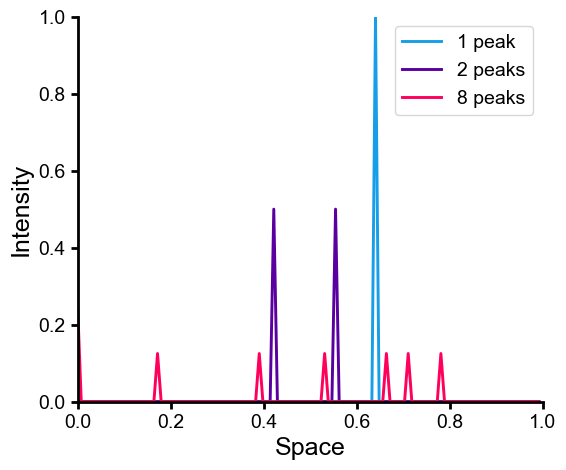

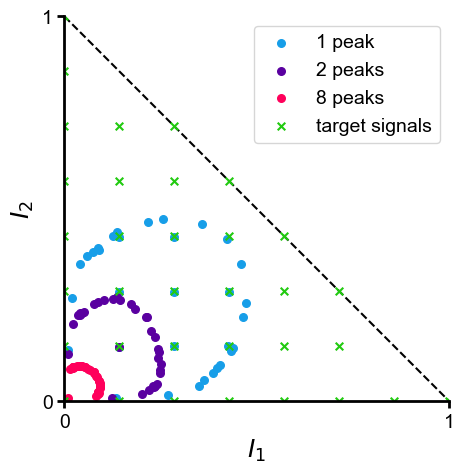

In [2]:
sampling_indices = (3, 4)

grid_density = 8

input_signals = [sample_amplitude_object('delta', num_deltas=1), 
                 sample_amplitude_object('delta', num_deltas=2),
                    sample_amplitude_object('delta', num_deltas=8)]
labels = ['1 peak', '2 peaks', '8 peaks']

# make a 3x1 plot with shared x and y axes showing the input signals
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for i, (input_signal, label) in enumerate(zip(input_signals, labels)):
    plot_in_spatial_coordinates(ax, input_signal, show_samples=False, label=label)
ax.legend()


target_signals = make_intensity_coordinate_sampling_grid(sampling_indices, sample_n=grid_density)

sets_of_output_signals = []
for input_signal in input_signals:
    optimized_kernels, output_signals = optimize_towards_target_signals(target_signals, input_signal, sampling_indices)
    sets_of_output_signals.append(output_signals)

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for output_signals, label in zip(sets_of_output_signals, labels):
    plot_in_intensity_coordinates(ax, output_signals, label=label, sample_point_indices=sampling_indices)
plot_in_intensity_coordinates(ax, target_signals, label='target signals',  marker='x',  sample_point_indices=sampling_indices)
ax.legend()